## CM4044: AI In Chemistry
## Semester 1 2020/21

<hr>

## Tutorial 5.5: Common Machine Learning (ML) Algorithms Part V
## Objectives

### $\bullet$ Hyperparameter Optimisation
### $\bullet$ Pipeline


<hr>

This tutorial continues the second part of the same topic, "Introduction to Common Machine Learning Algorithms".

## 1. Hyperparameter Optimisation

In the previous tutorials about the common machine learning methods, you have known that machine learning algorithms are mostly iterative methods. So a machine learning model has two different types of parameters:

- **Hyperparameters**: the parameters which can be arbitrarily set by the user before starting training (eg. number of estimators in Random Forest, number of cluster in KMean, layers of tree nodes in decision tree, learning rate in regression, L1 or L2 regularisation, etc).
- **Model parameters**: the parameters are learned from data set during the model training (eg. the weights in a regression function).

Hyperparameter optimisation in machine learning intends to find the hyperparameters of a given machine learning algorithm that deliver the best performance as measured on a validation set. In practice, there are the possible approaches:
1. Manual Search
2. Grid Search
3. Random Search
4. Automatic Search (Bayesian Optimisation, Genetic Algorithm)
5. Artifical Neural Network (ANN) Tuning

Manual search means we select hyperparameters of a model based on our experience and judge. We then train the model, evaluate its accuracy and start the process again. This loop is repeated until a satisfactory accuracy is scored. Somtimes, this kind of work is called as "babysitting" machine learning model. While manual search is a good mean to educate the beginner, it is never a choice for industry applications for its low efficiency.

Grid search and random search are two simple systematic methods in hyperparameter optimisation. We focus on the use of these two methods in this tutorial.

### 1.1 Grid search

In a grid search, we create a grid of hyperparameters and just try all of their combinations (hence, this method is called grid search) by applying `GridSearchCV()` in scikit-learn.

For example, we can apply grid search to tune hyperparameters for wine classification in a random forest classifier:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint
%matplotlib inline

from sklearn import metrics
from sklearn.model_selection import train_test_split

# in this csv data file, it uses ';' to seperate columns
wine = pd.read_csv('./winequality-white.csv', sep=';')

pprint(wine.head())

print()

pprint(wine.info())

print()

pprint(wine.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

We skip the data visulisation in this process, which we have done in the past notebook "Introduction to Common ML Methods B".

Split the data set into train and test set:

In [2]:
#wine_features = wine.drop(['free sulfur dioxide','citric acid','quality'], axis=1)
wine_features = wine.drop(['quality'], axis=1)
wine_label = wine.quality

# Divide data into training and validation subsets
X_train, X_test, y_train, y_test = train_test_split(wine_features, wine_label, train_size=0.8, test_size=0.2,
                                                                random_state=0)

We initilise the randome forest classifier, and we check the list of hyperparameters used in the classifier.

In [3]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()  

print('Parameters currently in use:\n')
pprint(rf_clf.get_params())


Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


Randome Forest classifier has a lot of hyperparameters, how do we know where to start? A good place is the documentation on the random forest in scikit-learn. This tells us the most important settings are the number of trees in the forest (n_estimators) and the number of features considered for splitting at each leaf node (max_features).

We will try adjusting the following set of hyperparameters:

- n_estimators = number of trees in the foreset
- max_features = max number of features considered for splitting a node
- max_depth = max number of levels in each decision tree
- min_samples_split = min number of data points placed in a node before the node is split
- min_samples_leaf = min number of data points allowed in a leaf node
- bootstrap = method for sampling data points (with or without replacement)

In [4]:
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid based on the results of random search 
# the grid is stored in a dictionary object
#param_grid = {
#    'bootstrap': [True],
#    'max_depth': [80, 90, 100, 110],
#    'max_features': ['sqrt', 'log2', 2, 3],
#    'min_samples_leaf': [3, 4, 5],
#    'min_samples_split': [8, 10, 12],
#    'n_estimators': [100, 300, 500, 800, 1000]
#}

# we only search for three hyperparameters to cut running time
# the grid is stored in a dictionary object
param_grid = {
    'max_depth': [80, 90, 100],
    'max_features': ['sqrt', 'log2'],
    'n_estimators': [100, 300, 500, 800, 1000]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf_clf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

For comparison, we set up a base random forest model and evaluate its metrics of classification performance.

Model Performance
Accuracy:  0.6316326530612245
Predicted  4    5    6   7  8
Actual                       
3          1    5    3   0  0
4          7   23   20   1  0
5          5  194   91   5  0
6          1   64  312  29  3
7          0   16   66  98  3
8          0    5   11   9  8


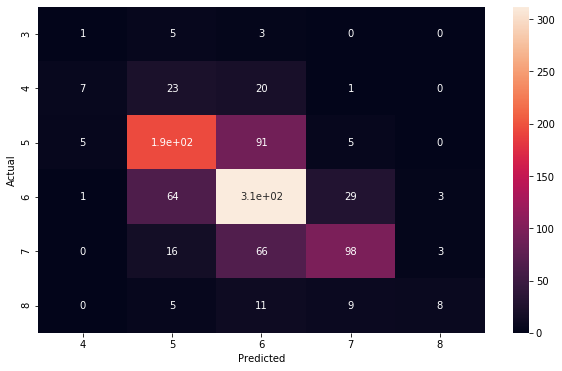

In [5]:
# a self-made function to print the metrics for classification
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    
    print('Model Performance')
    print('Accuracy: ', metrics.accuracy_score(test_labels, predictions))

    #evaluate the classifier by confusion matrix
    confusion_matrix = pd.crosstab(test_labels, predictions, 
                                   rownames=['Actual'], colnames=['Predicted'])
    
    print(confusion_matrix)
    plt.figure(figsize=(10,6))
    sns.heatmap(confusion_matrix, annot=True)
  
    
    
base_model = RandomForestClassifier(n_estimators = 10, random_state = 0)
base_model.fit(X_train, y_train)
evaluate(base_model, X_test, y_test)

Start grid searching for best hyperparameters:

In [6]:
grid_search.fit(X_train, y_train)
pprint(grid_search.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   25.2s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  2.3min finished


{'max_depth': 100, 'max_features': 'log2', 'n_estimators': 300}



Model Performance
Accuracy:  0.6489795918367347
Predicted  4    5    6   7  8
Actual                       
3          0    5    4   0  0
4          6   24   20   1  0
5          0  187  106   2  0
6          0   48  337  24  0
7          0    4   80  97  2
8          0    0   13  11  9


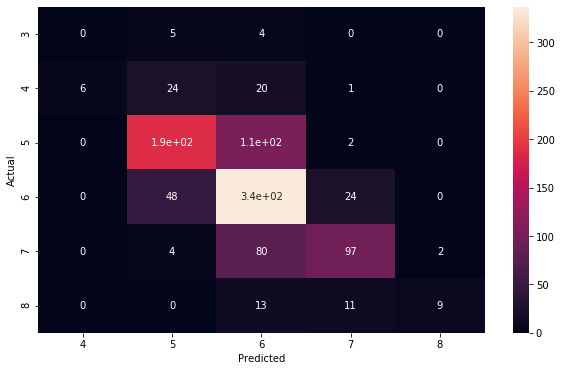

In [7]:
# Fit the grid search to the data
best_model = grid_search.best_estimator_

print()
evaluate(best_model, X_test, y_test)

### 1.2 Random search

Grid search method can easily become very computation demanding if there are a lot of hyperparameters to be optimised. A more efficient search method is random search based on the input of the distribution of hyperparameters. Scikit-learn has implemented the searching method in `RandomizedSearchCV()`.

An example below:

In [8]:
from sklearn.model_selection import RandomizedSearchCV

# n_estimators in uniform distribution
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]
# we only search for three hyperparameters to cut running time
# the grid is stored in a dictionary object
random_grid = {
    'max_depth': [80, 90, 100],
    'max_features': ['sqrt', 'log2'],
    'n_estimators': n_estimators
}

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random_search = RandomizedSearchCV(estimator = rf_clf, param_distributions = random_grid, n_iter = 20, 
                               cv = 5, verbose=2, n_jobs = -1)

- In contrast to GridSearchCV, not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions. The number of parameter settings that are tried is given by `n_iter`.

In [9]:
rf_random_search.fit(X_train, y_train)
pprint(rf_random_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   30.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.6min finished


{'max_depth': 90, 'max_features': 'log2', 'n_estimators': 1000}


Model Performance
Accuracy:  0.6581632653061225
Predicted  4    5    6   7  8
Actual                       
3          0    5    4   0  0
4          6   25   19   1  0
5          0  194   98   3  0
6          0   48  338  23  0
7          0    5   79  98  1
8          0    0   12  12  9


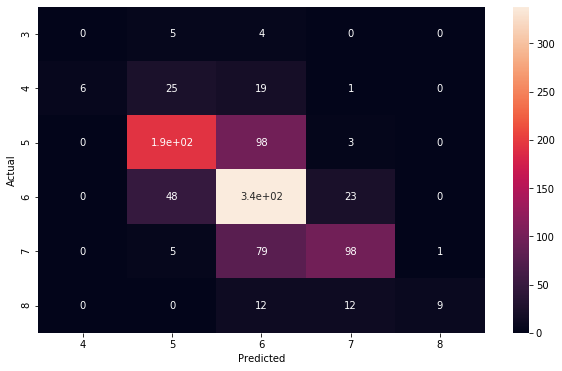

In [10]:
best_random_model = rf_random_search.best_estimator_

evaluate(best_random_model, X_test, y_test)

## 2 Pipeline

So now you have some experiences about developing machine learning models. You may realise that workflow of machine learning involves a sequence of tasks including:

- data exploratory analysis,
- feature extraction,
- data pre-processing: missing data handling, data scaling, categorical data encoding, etc.
- model fitting, 
- hyperparameter tuning, 
- model validation. 

Normally, steps such as data pre-processing, model fitting, hyperparameter tuning and validation in machine learning are closely chained by data processed in the previous step, as such, it is wise to creat a pipeline to tie up these steps so data flow is well organised:

<img src="./Pipeline2.jpg" width="400" height="400" />





### 2.1 A simple pipeline

Let us take a look at a simple pipeline to chain data pre-processing and model fitting, for example, we design a work flow to classify the iris flower data set by a logistic regression model below:

<img src="./Figures/iris_pipeline.png" width="500" height="500" />

So the workflow can be projected to use a pipeline below:

In [11]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Load and split the data
iris = load_iris()  # scikit-learn stores some famous data set for learning
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size= 0.2,random_state=42 )
print(X_train.shape)
print(X_train[0:10,:]) # print the first ten rows

(120, 4)
[[4.6 3.6 1.  0.2]
 [5.7 4.4 1.5 0.4]
 [6.7 3.1 4.4 1.4]
 [4.8 3.4 1.6 0.2]
 [4.4 3.2 1.3 0.2]
 [6.3 2.5 5.  1.9]
 [6.4 3.2 4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.2 4.1 1.5 0.1]]


In [12]:
# build the pipeline object
# The Pipeline is built using a list of (key, value) pairs, 
# where the key is a string containing the name you want to give this step 
# and the value is an estimator objec
estimators = []    # a python list
estimators.append(('minmax', MinMaxScaler()))
estimators.append(('lr', LogisticRegression()))
pipe_lr = Pipeline(estimators)

# call fit() method to invoke pipeline of data flow
pipe_lr.fit(X_train, y_train)

# calculate score for validation
score = pipe_lr.score(X_test, y_test)
print('Logistic Regression pipeline test accuracy: %.3f' % score)


Logistic Regression pipeline test accuracy: 0.967


In this example, we created a pipeline constituting of two steps, that is, minmax scaling and LogisticRegression. When we executed the fit method on pipe_lr, the MinMaxScaler performed a fit and transform method on the input data, and it was passed on to the estimator, which is a logistic regression model. **These intermediate steps in a pipeline are known as transformers, and the last step is an estimator.**

### 2.2 Pipeline for model selection

The use of machine learning pipeline helps to select the best model from several machine learning algorithms. For example, to classify iris flower, we can build some classification models trained by data and evaluate which one has best performance.

In the following example, we use pipeline to organise three steps: data scaling by standard scaler, PCA to do feacture dimensionality reduction, and a classifier. The example is adopted from [here.](https://www.kdnuggets.com/2017/12/managing-machine-learning-workflows-scikit-learn-pipelines-part-1.html)

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import joblib
from sklearn import svm
from sklearn import tree

# Construct some pipelines
pipe_lr = Pipeline([('scl', StandardScaler()),
            ('pca', PCA(n_components=2)),
            ('clf', LogisticRegression(random_state=42))])

pipe_svm = Pipeline([('scl', StandardScaler()),
            ('pca', PCA(n_components=2)),
            ('clf', svm.SVC(random_state=42))])
 
pipe_dt = Pipeline([('scl', StandardScaler()),
            ('pca', PCA(n_components=2)),
            ('clf', tree.DecisionTreeClassifier(random_state=42))])

# List of pipelines for ease of iteration
pipelines = [pipe_lr, pipe_svm, pipe_dt]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Support Vector Machine', 2: 'Decision Tree'}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

# Compare accuracies
for idx, val in enumerate(pipelines):
    print('%s pipeline test accuracy: %.3f' % (pipe_dict[idx], val.score(X_test, y_test)))

# Identify the most accurate model on test data
best_acc = 0.0
best_clf = 0
best_pipe = ''
for idx, val in enumerate(pipelines):
    if val.score(X_test, y_test) > best_acc:
        best_acc = val.score(X_test, y_test)
        best_pipe = val
        best_clf = idx
print('Classifier with best accuracy: %s' % pipe_dict[best_clf])

# Save pipeline to file
joblib.dump(best_pipe, 'best_pipeline.pkl', compress=1)
print('Saved %s pipeline to file' % pipe_dict[best_clf])

Logistic Regression pipeline test accuracy: 0.900
Support Vector Machine pipeline test accuracy: 0.900
Decision Tree pipeline test accuracy: 0.867
Classifier with best accuracy: Logistic Regression
Saved Logistic Regression pipeline to file


### 2.3 Pipeline for hyperparameter tuning

#### 2.3.1 Pipeline and grid search

Another simple yet powerful technique we can pair with pipelines to improve performance is grid search, which attempts to optimize model hyperparameter combinations. For example, we use SVM classifier to analyse iris data, and this model needs to search for optimised hyperparameters to achieve good performance.

Of importance, note that our pipeline is the **estimator** in the grid search object, and that it is at the level of the grid search object which we fit our model(s). Also note that our grid parameter space is defined in a dictionary and then fed to our grid search object.


In [14]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
#from sklearn import tree
from sklearn import svm
from sklearn.metrics import classification_report

# Load and split the data
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Construct pipeline
pipe_svm = Pipeline([('scl', StandardScaler()),
            ('pca', PCA(n_components=2)),
            ('clf', svm.SVC(random_state=42))])

# Set grid search params
# Pay great attention to the double underscore __ used below:
# 'clf__C': the C grids 
# 'clf__gamma': the gamma grids
# 'clf__kernel': the kernel grids
grid_params_svm = {'clf__C': [0.1, 1, 10, 100, 1000],  
              'clf__gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'clf__kernel': ['rbf', 'linear', 'poly', 'sigmoid']}  

# Construct grid search
gs = GridSearchCV(estimator=pipe_svm,
            param_grid=grid_params_svm,
            scoring='accuracy',
            cv=5, verbose=2, n_jobs=-1)

# Fit using grid search
gs.fit(X_train, y_train)

y_pred = gs.predict(X_test)

# Best accuracy
print('Best accuracy: %.3f' % gs.best_score_)

# Best params
print('\nBest params:\n', gs.best_params_)

print('classification report')
print(classification_report(y_test, y_pred))
print()

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s


Best accuracy: 0.917

Best params:
 {'clf__C': 1, 'clf__gamma': 1, 'clf__kernel': 'rbf'}
classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30




[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished


- the score has improved from 0.900 to 0.925
- If you use a pipeline as the estimator in a grid search, you need to use a special syntax when specifying the parameter grid. Specifically, you need to use the step name followed by a **double underscore**, followed by the parameter name as you would pass it to the estimator, such as `clf__C`, `clf__gamma`, and `clf_kernel` in the example.

#### 2.3.2 Pipeline and random search

Pipeline can also work with random search in hyperparameter optimisation. What we need to do is to change the method from grid search `GridSearchCV()` to random search `RandomizedSearchCV()`.

In [15]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
#from sklearn import tree
from sklearn import svm
from sklearn.metrics import classification_report

# Load and split the data
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Construct pipeline
pipe_svm = Pipeline([('scl', StandardScaler()),
            ('pca', PCA(n_components=2)),
            ('clf', svm.SVC(random_state=42))])

print(pipe_svm.get_params().keys())

# Set grid search params
# Pay great attention to the double underscore __ used below:
# 'clf__C': the C grids 
# 'clf__gamma': the gamma grids
# 'clf__kernel': the kernel grids
grid_params_svm = {'clf__C': [0.1, 1, 10, 100, 1000],  
              'clf__gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'clf__kernel': ['rbf', 'linear', 'poly', 'sigmoid']}  

# Construct grid search
gs = RandomizedSearchCV(estimator=pipe_svm,
            param_distributions=grid_params_svm,
            scoring='accuracy', n_iter = 20,
            cv=5, verbose=2, n_jobs=-1)

# Fit using grid search
gs.fit(X_train, y_train)

y_pred = gs.predict(X_test)

# Best accuracy
print('Best accuracy: %.3f' % gs.best_score_)

# Best params
print('\nBest params:\n', gs.best_params_)

print('classification report')
print(classification_report(y_test, y_pred))
print()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


dict_keys(['memory', 'steps', 'verbose', 'scl', 'pca', 'clf', 'scl__copy', 'scl__with_mean', 'scl__with_std', 'pca__copy', 'pca__iterated_power', 'pca__n_components', 'pca__random_state', 'pca__svd_solver', 'pca__tol', 'pca__whiten', 'clf__C', 'clf__break_ties', 'clf__cache_size', 'clf__class_weight', 'clf__coef0', 'clf__decision_function_shape', 'clf__degree', 'clf__gamma', 'clf__kernel', 'clf__max_iter', 'clf__probability', 'clf__random_state', 'clf__shrinking', 'clf__tol', 'clf__verbose'])
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best accuracy: 0.917

Best params:
 {'clf__kernel': 'rbf', 'clf__gamma': 0.1, 'clf__C': 100}
classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


- Random search has reached the same optimal set of hyperparameters with less searching time.